# Avazu - Click-Through Rate Prediction

Julia Kang - jkang613@gmail.com - AMLI 2019 - Mills College

In [2]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from math import sqrt #for RMSE


## Model: Simple Random Forest Classifier 

In [6]:
# raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = pd.read_csv('numeric_rand_sample.csv')
raw_df = raw_df.drop('Unnamed: 0', axis = 1) 

raw_df.head() #ad id is unique to each row
# len(sub_df)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,time,device_type_a,device_type_b,device_type_c,device_type_d,device_type_e,device_conn_type_a,device_conn_type_b,device_conn_type_c,device_conn_type_d
0,0,1005,0,755,1712,3,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
1,1,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
2,0,1002,0,2052,1680,5,2129,65,0,30034,...,0,1,0,0,0,0,1,0,0,0
3,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
4,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0


In [7]:
FEATURES = []

for col in raw_df.columns:
    if np.issubdtype(raw_df[col].dtypes , np.number):
        FEATURES.append(col)

TARGET = 'click'

In [14]:
FEATURES

['click',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'day_of_week',
 'date',
 'time',
 'device_type_a',
 'device_type_b',
 'device_type_c',
 'device_type_d',
 'device_type_e',
 'device_conn_type_a',
 'device_conn_type_b',
 'device_conn_type_c',
 'device_conn_type_d']

In [8]:
# split the data into test and train
train, test  = train_test_split(
  raw_df,                        # split our digits dataframe
  stratify=raw_df[TARGET],       # stratify by the 'click' column   
  test_size=0.2,                # 20% of the data should be held for testing
  random_state=42               # hard-coded random state for repeatability in the example
)

train.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,time,device_type_a,device_type_b,device_type_c,device_type_d,device_type_e,device_conn_type_a,device_conn_type_b,device_conn_type_c,device_conn_type_d
242327,0,1005,0,1145,1680,5,2294,75,3,43137,...,4,0,1,0,0,0,1,0,0,0
274613,1,1005,1,1854,1327,19,2129,65,0,43137,...,3,0,1,0,0,0,1,0,0,0
323457,0,1005,0,263,2056,1,2129,65,0,43137,...,0,0,1,0,0,0,1,0,0,0
275743,0,1005,1,837,180,19,2129,65,0,43137,...,4,0,1,0,0,0,1,0,0,0
394154,0,1005,1,284,1895,19,2129,65,0,43137,...,16,0,1,0,0,0,1,0,0,0


In [9]:
#take preprocessed data from above for train and test set
train_features = np.array(train[FEATURES])
train_labels = np.array(train[TARGET])
test_features = np.array(test[FEATURES])
test_labels = np.array(test[TARGET])

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (323528, 34)
Training Labels Shape: (323528,)
Testing Features Shape: (80882, 34)
Testing Labels Shape: (80882,)


In [10]:
# Instantiate model with 10 decision trees - this will be our baseline model
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels.ravel()) #use ravel() - it flattens the array

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [11]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#reshape predictions to have 1 column to later use to concatenate
predictions = predictions.reshape(80882,1)

In [12]:
RMSE = sqrt(metrics.mean_squared_error(test_labels, predictions))
print("RMSE when n_estimators = 10 is {}".format(RMSE))
# #RMSE: 0.4315343595981214 with n_estimators = 10

LL = sqrt(metrics.log_loss(test_labels, predictions))
print("RMSE when n_estimators = 10 is {}".format(LL))

RMSE when n_estimators = 10 is 0.0
RMSE when n_estimators = 10 is 3.161013638317053e-08


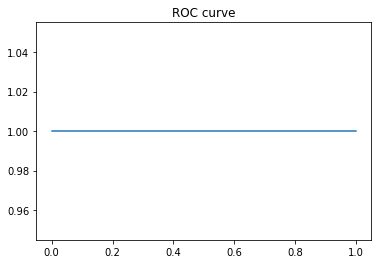

AUC when n_estimators = 10 is 1.0


In [13]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.show()

print("AUC when n_estimators = 10 is {}".format(roc_auc))



### Random Forest - Parameter Tuning

In [15]:
#try different n_estimators to see if we can find an optimal number of trees
n_estimators = [1, 10, 64, 225, 500]

ll_results = []
auc_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, random_state = 42)
    rf.fit(train_features, train_labels.ravel())
    predictions = (rf.predict(test_features)).reshape(80882,1)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
    
    #metrics
    roc_auc = metrics.auc(fpr, tpr)
    auc_results.append(roc_auc)
    LL = sqrt(metrics.log_loss(test_labels, predictions))
    ll_results.append(RMSE)
    
    print(("Model where n_estimator = {} completed").format(estimator))
    
    
ll_results
# auc_results

Model where n_estimator = 1 completed
Model where n_estimator = 10 completed
Model where n_estimator = 64 completed


KeyboardInterrupt: 

In [16]:
ll_results

[0.0, 0.0, 0.0]